## Load Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive
import time
import logging

from mlrose_hiive import NeuralNetwork
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, cross_validate
from sklearn.metrics import accuracy_score, log_loss

## Load Data

In [2]:
df = pd.read_csv('/home/zsang/Documents/OSMCS/CS 7641/Projects/p1/datasets/apple_quality.csv')
df.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [3]:
df.drop('A_id', axis=1, inplace=True)
df.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [4]:
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [5]:
col_filter = df.select_dtypes(include='object').columns
df[col_filter] = df[col_filter].astype('string')
df.dtypes

Size                  float64
Weight                float64
Sweetness             float64
Crunchiness           float64
Juiciness             float64
Ripeness              float64
Acidity               float64
Quality        string[python]
dtype: object

In [6]:
string_col = df.select_dtypes("string").columns
print(string_col)
num_col = df.columns.to_list()
num_col.remove('Quality')
print(num_col)

Index(['Quality'], dtype='object')
['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']


## Preprocessing

In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   string 
dtypes: float64(7), string(1)
memory usage: 250.1 KB


Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [8]:
### Encoding categorical values into numeric values ###
from sklearn.preprocessing import LabelEncoder
df_tree = df.copy()
target = 'Quality'
print(df_tree.head(10))
df_tree[target] = LabelEncoder().fit_transform(df_tree[target])
df_tree.head(10)

       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   
5 -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616 -2.981523   
6  1.331606  1.635956   0.875974    -1.677798   3.106344 -1.847417  2.414171   
7 -1.995462 -0.428958   1.530644    -0.742972   0.158834  0.974438 -1.470125   
8 -3.867632 -3.734514   0.986429    -1.207655   2.292873  4.080921 -4.871905   
9 -0.727983 -0.442820  -4.092223     0.597513   0.393714  1.620857  2.185608   

  Quality  
0    good  
1    good  
2     bad  
3    good  
4    good  
5     bad  
6    good  
7    good  
8     bad  

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,0


In [9]:
target='Quality'
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

# Load data
X = df_tree[feature_col_tree]
y = df_tree[target]

## Processing

In [10]:
final_accuracy = {}
final_precision = {}
clock_time = {}
fitness_curves = {}

#### Gradient Descent

Time elapsed: 26.401149034500122 seconds


<Figure size 1000x600 with 0 Axes>

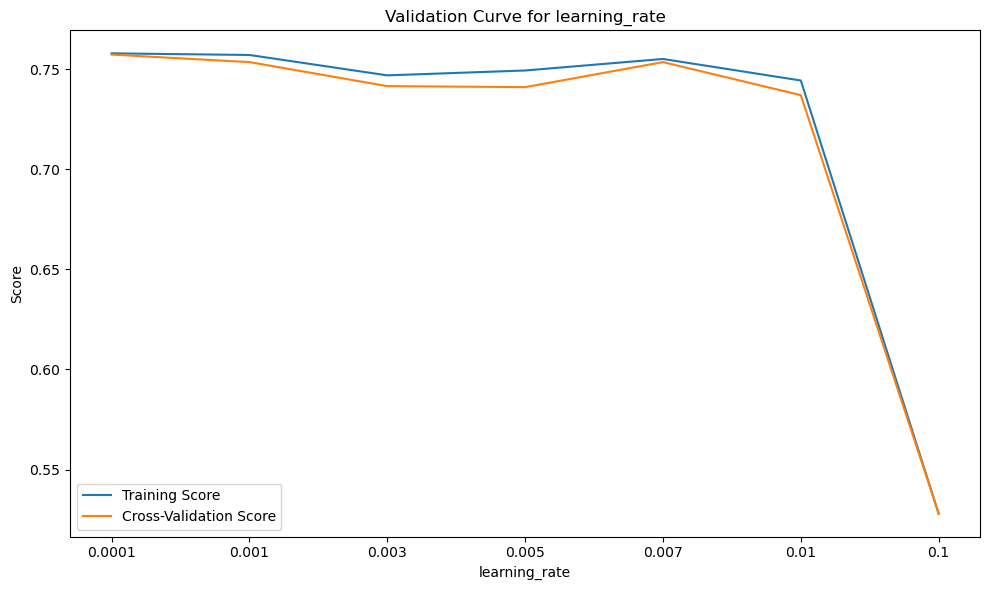

In [11]:
# Define the hyperparameter values to be tested
param_range_learning_rate = [0.0001, 0.001, 0.003, 0.005, 0.007, 0.01, 0.1]

start_time = time.time()
# Validation Curve for learning_rate
train_scores_learning_rate, test_scores_learning_rate = validation_curve(
    NeuralNetwork(hidden_nodes=[14],
                  activation='sigmoid',
                  algorithm='gradient_descent',
                  max_iters=1000,
                  early_stopping=True,
                  clip_max=5,
                  max_attempts=100,
                  random_state=164345,
                  curve=False),
    X, y, param_name='learning_rate', param_range=param_range_learning_rate, cv=5, n_jobs=8, scoring='accuracy'
)

end_time = time.time()
time_elapsed = end_time - start_time
print(f'Time elapsed: {time_elapsed} seconds')

plt.figure(figsize=(10, 6))

# Plot Validation Curve for learning_rate
plt.figure(figsize=(10, 6))
plt.plot(range(len(param_range_learning_rate)), np.mean(train_scores_learning_rate, axis=1), label='Training Score')
plt.plot(range(len(param_range_learning_rate)), np.mean(test_scores_learning_rate, axis=1), label='Cross-Validation Score')
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.xticks(range(len(param_range_learning_rate)), param_range_learning_rate)
plt.title('Validation Curve for learning_rate')
plt.legend()
plt.tight_layout()
plt.savefig('/home/zsang/Documents/OSMCS/CS 7641/Projects/p2/plots/VC_NN_gd.png')
plt.show()

Time elapsed : 163.7943980693817 seconds


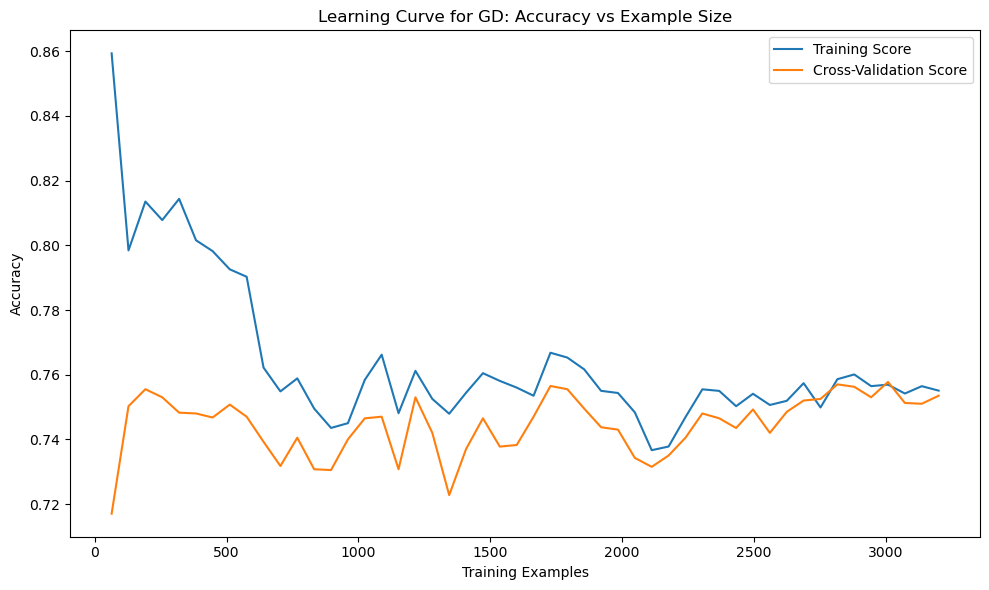


##########################################
Final Accuracy: 0.75
Final Precision: 0.76cross_validate
Training Time: 2.8510 seconds
##########################################



In [12]:
# Learning Curve
start_time = time.time()

clf = NeuralNetwork(hidden_nodes=[14],
                    learning_rate=0.007,
                    activation='sigmoid',
                    algorithm='gradient_descent',
                    max_iters=1000,
                    early_stopping=True,
                    clip_max=5,
                    max_attempts=100,
                    random_state=164345,
                    curve=False)

train_sizes, train_scores_gd, test_scores_gd = learning_curve(
    clf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.02, 1.0, 50), n_jobs=5
)

end_time = time.time()
time_elapsed = end_time - start_time
print(f'Time elapsed : {time_elapsed} seconds')

# Plot accuracy against train data size
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores_gd, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores_gd, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for GD: Accuracy vs Example Size')
plt.legend()
plt.tight_layout()
plt.savefig('/home/zsang/Documents/OSMCS/CS 7641/Projects/p2/plots/LC_NN_gd')
plt.show()

# Reset the classifier
clf = NeuralNetwork(hidden_nodes=[14],
                    learning_rate=0.007,
                    activation='sigmoid',
                    algorithm='gradient_descent',
                    max_iters=1000,
                    early_stopping=True,
                    clip_max=5,
                    max_attempts=100,
                    random_state=164345,
                    curve=True)

fitness_curves['gd'] = clf.fitness_curve

# Cross-validation with multiple metrics
scoring = {'accuracy': 'accuracy', 'precision': 'precision_weighted'}
cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

# Extract metrics and training time
final_accuracy['gd'] = np.mean(cv_results['test_accuracy'])
final_precision['gd'] = np.mean(cv_results['test_precision'])
clock_time['gd'] = np.mean(cv_results['fit_time'])

print(f'''
##########################################
Final Accuracy: {final_accuracy['gd']:.2f}
Final Precision: {final_precision['gd']:.2f}cross_validate
Training Time: {clock_time['gd']:.4f} seconds
##########################################
''')

#### Randomized Hill Climbing

Time elapsed: 344.4338936805725 seconds


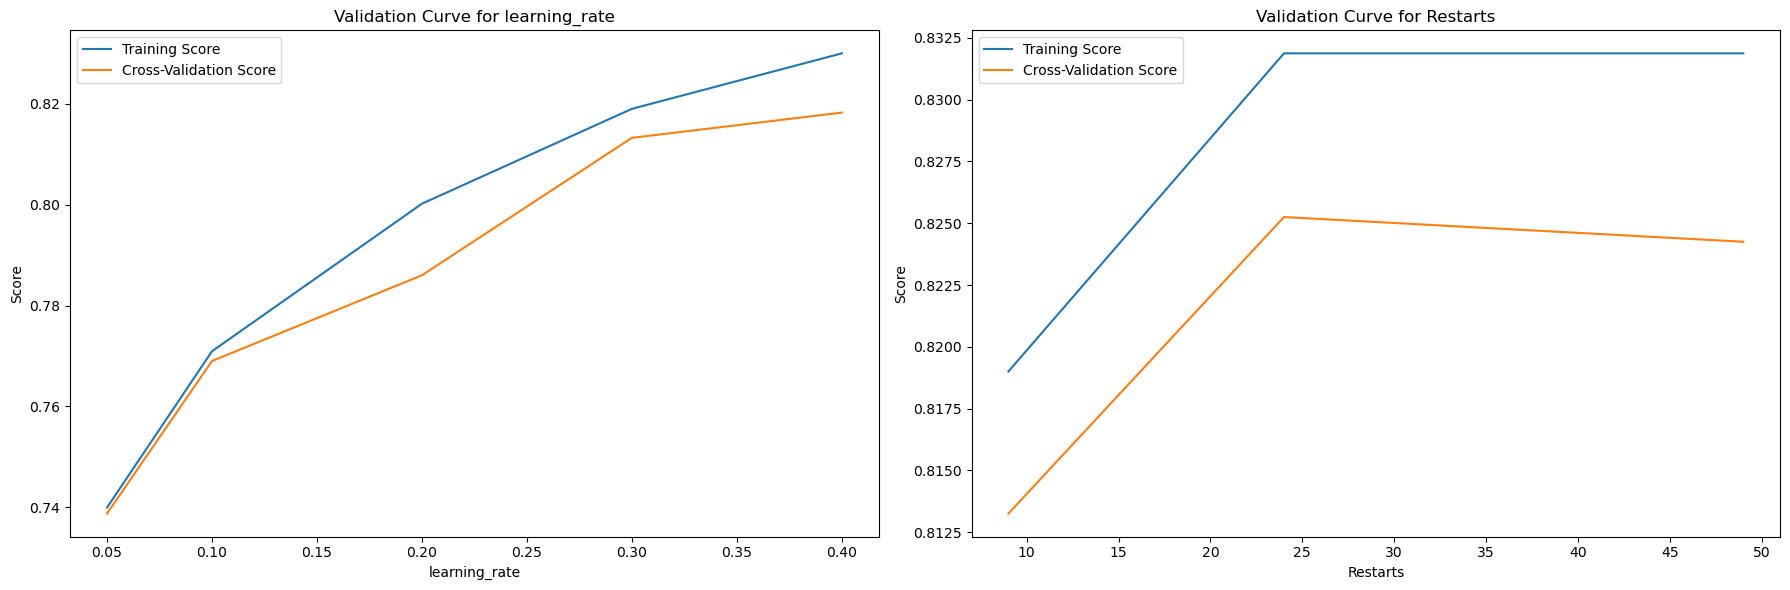

In [13]:
# Define the hyperparameter values to be tested
param_range_learning_rate = [0.05, 0.1, 0.2, 0.3, 0.4]
param_range_restarts = [9, 24, 49]

start_time = time.time()
# Validation Curve for learning_rate
train_scores_learning_rate, test_scores_learning_rate = validation_curve(
    NeuralNetwork(hidden_nodes=[14],
                  activation='sigmoid',
                  algorithm='random_hill_climb',
                  max_iters=1000,
                  restarts=9,
                  early_stopping=True,
                  clip_max=5,
                  max_attempts=100,
                  random_state=123123,
                  curve=False),
    X, y, param_name='learning_rate', param_range=param_range_learning_rate, cv=5, n_jobs=8, scoring='accuracy'
)

# Validation Curve for restarts
train_scores_restarts, test_scores_restarts = validation_curve(
    NeuralNetwork(hidden_nodes=[14],
                  activation='sigmoid',
                  algorithm='random_hill_climb',
                  max_iters=1000,
                  learning_rate=0.3,
                  early_stopping=True,
                  clip_max=5,
                  max_attempts=100,
                  random_state=123123,
                  curve=False),
    X, y, param_name='restarts', param_range=param_range_restarts, cv=5, n_jobs=8, scoring='accuracy'
)

end_time = time.time()
time_elapsed = end_time - start_time
print(f'Time elapsed: {time_elapsed} seconds')

# Plot both Validation Curves side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Validation Curve for learning_rate
axes[0].plot(param_range_learning_rate, np.mean(train_scores_learning_rate, axis=1), label='Training Score')
axes[0].plot(param_range_learning_rate, np.mean(test_scores_learning_rate, axis=1), label='Cross-Validation Score')
axes[0].set_xlabel('learning_rate')
axes[0].set_ylabel('Score')
axes[0].set_title('Validation Curve for learning_rate')
axes[0].legend()

# Plot Validation Curve for restarts
axes[1].plot(param_range_restarts, np.mean(train_scores_restarts, axis=1), label='Training Score')
axes[1].plot(param_range_restarts, np.mean(test_scores_restarts, axis=1), label='Cross-Validation Score')
axes[1].set_xlabel('Restarts')
axes[1].set_ylabel('Score')
axes[1].set_title('Validation Curve for Restarts')
axes[1].legend()

plt.tight_layout()
plt.savefig('/home/zsang/Documents/OSMCS/CS 7641/Projects/p2/plots/VC_NN_rhc.png')
plt.show()

Time elapsed 1: 1051.2988755702972 seconds


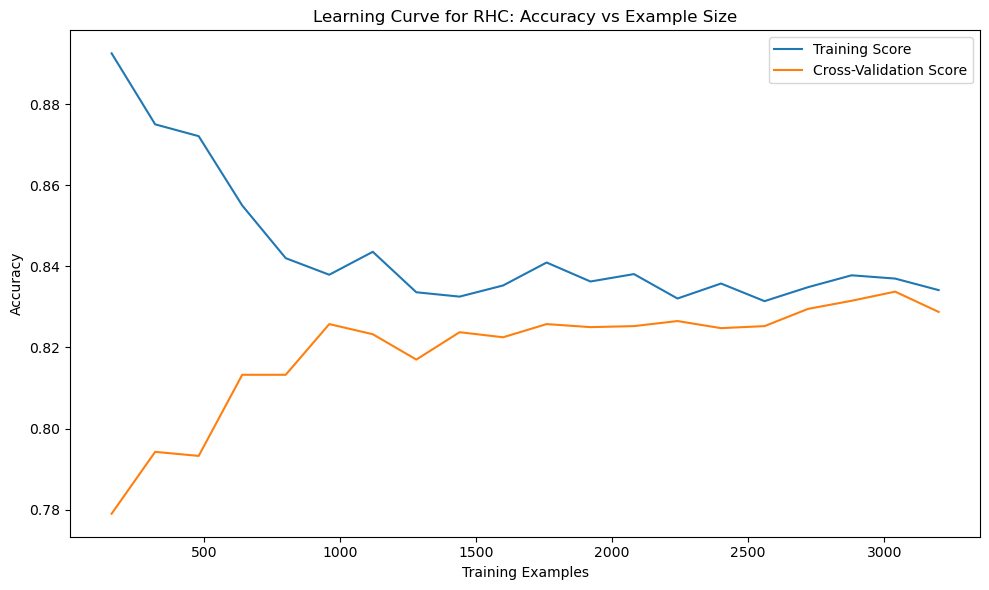


##########################################
Final Accuracy: 0.83
Final Precision: 0.83
Training Time: 40.8942 seconds
##########################################



In [14]:
# Learning Curve
start_time = time.time()

clf = NeuralNetwork(hidden_nodes=[14],
                    activation='sigmoid',
                    algorithm='random_hill_climb',
                    max_iters=1000,
                    learning_rate=0.3,
                    early_stopping=True,
                    clip_max=5,
                    restarts=24,
                    max_attempts=100,
                    random_state=40,
                    curve=False)

train_sizes, train_scores_rhc, test_scores_rhc = learning_curve(
    clf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.05, 1.0, 20), n_jobs=5
)

end_time = time.time()
time_elapsed = end_time - start_time
print(f'Time elapsed 1: {time_elapsed} seconds')

# Plot accuracy against train data size
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores_rhc, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores_rhc, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for RHC: Accuracy vs Example Size')
plt.legend()
plt.tight_layout()
plt.savefig('/home/zsang/Documents/OSMCS/CS 7641/Projects/p2/plots/LC_NN_rhc')
plt.show()

# Reset the classifier
clf = NeuralNetwork(hidden_nodes=[14],
                    activation='sigmoid',
                    algorithm='random_hill_climb',
                    max_iters=1000,
                    learning_rate=0.3,
                    early_stopping=True,
                    clip_max=5,
                    restarts=24,
                    max_attempts=100,
                    random_state=40,
                    curve=True)

fitness_curves['rhc'] = clf.fitness_curve

# Cross-validation with multiple metrics
scoring = {'accuracy': 'accuracy', 'precision': 'precision_weighted'}
cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

# Extract metrics and training time
final_accuracy['rhc'] = np.mean(cv_results['test_accuracy'])
final_precision['rhc'] = np.mean(cv_results['test_precision'])
clock_time['rhc'] = np.mean(cv_results['fit_time'])

print(f'''
##########################################
Final Accuracy: {final_accuracy['rhc']:.2f}
Final Precision: {final_precision['rhc']:.2f}
Training Time: {clock_time['rhc']:.4f} seconds
##########################################
''')

#### Simulated Annealing

Time elapsed: 69.54045462608337 seconds


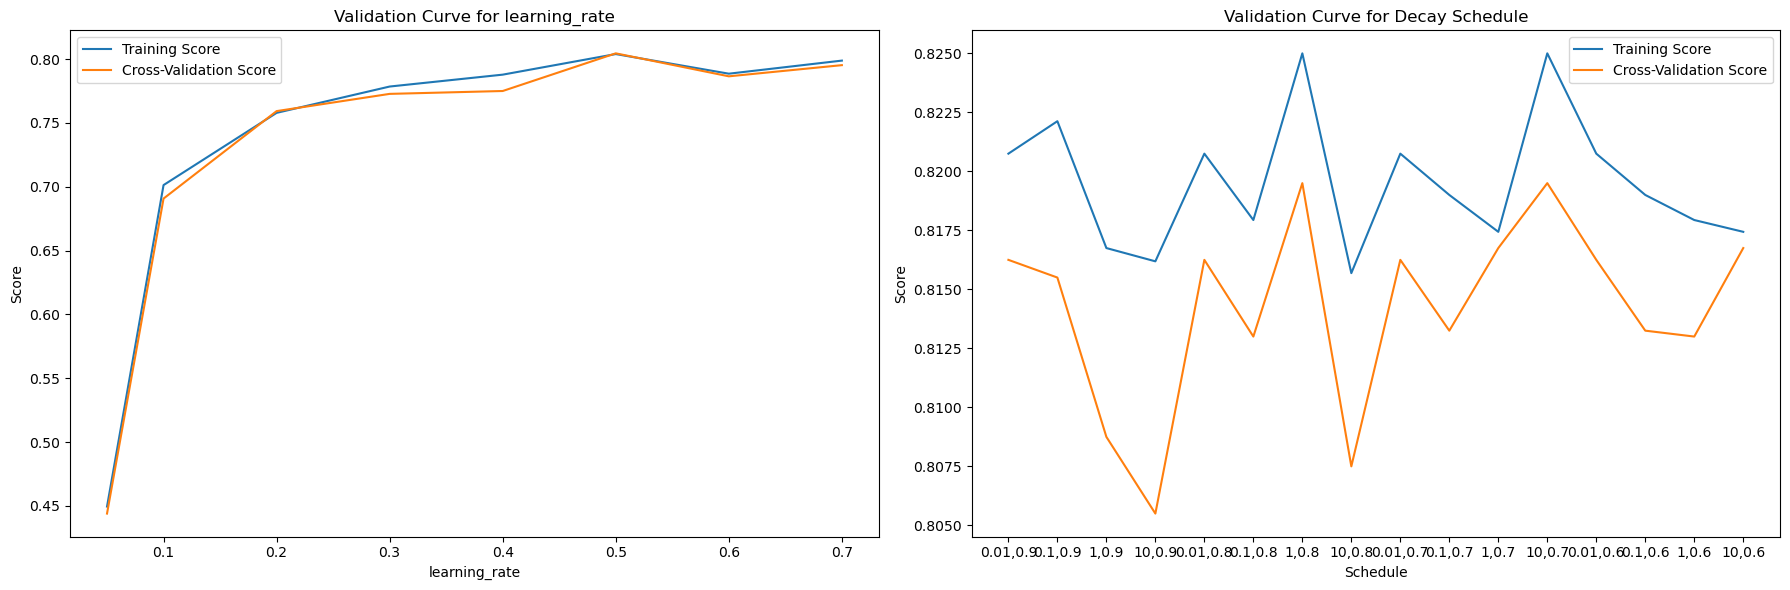

In [23]:
# Define the hyperparameter values to be tested
param_range_learning_rate = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
param_range_schedule = [mlrose_hiive.GeomDecay(init_temp=0.01, decay=0.9),
                        mlrose_hiive.GeomDecay(init_temp=0.1, decay=0.9),
                        mlrose_hiive.GeomDecay(init_temp=1, decay=0.9),
                        mlrose_hiive.GeomDecay(init_temp=10, decay=0.9),
                        mlrose_hiive.GeomDecay(init_temp=0.01, decay=0.8),
                        mlrose_hiive.GeomDecay(init_temp=0.1, decay=0.8),
                        mlrose_hiive.GeomDecay(init_temp=1, decay=0.8),
                        mlrose_hiive.GeomDecay(init_temp=10, decay=0.8),
                        mlrose_hiive.GeomDecay(init_temp=0.01, decay=0.7),
                        mlrose_hiive.GeomDecay(init_temp=0.1, decay=0.7),
                        mlrose_hiive.GeomDecay(init_temp=1, decay=0.7),
                        mlrose_hiive.GeomDecay(init_temp=10, decay=0.7),
                        mlrose_hiive.GeomDecay(init_temp=0.01, decay=0.6),
                        mlrose_hiive.GeomDecay(init_temp=0.1, decay=0.6),
                        mlrose_hiive.GeomDecay(init_temp=1, decay=0.6),
                        mlrose_hiive.GeomDecay(init_temp=10, decay=0.6)]
label_schedule = ['0.01,0.9', '0.1,0.9', '1,0.9', '10,0.9',
                  '0.01,0.8', '0.1,0.8', '1,0.8', '10,0.8',
                  '0.01,0.7', '0.1,0.7', '1,0.7', '10,0.7',
                  '0.01,0.6', '0.1,0.6', '1,0.6', '10,0.6']


start_time = time.time()
# Validation Curve for learning_rate
train_scores_learning_rate, test_scores_learning_rate = validation_curve(
    NeuralNetwork(hidden_nodes=[14],
                  activation='sigmoid',
                  algorithm='simulated_annealing',
                  max_iters=1000,
                  schedule=mlrose_hiive.GeomDecay(init_temp=1, decay=0.8),
                  early_stopping=True,
                  clip_max=5,
                  max_attempts=100,
                  random_state=978362,
                  curve=True),
    X, y, param_name='learning_rate', param_range=param_range_learning_rate, cv=5, n_jobs=8, scoring='accuracy'
)

# # Validation Curve for schedule
train_scores_schedule, test_scores_schedule = validation_curve(
    NeuralNetwork(hidden_nodes=[14],
                  activation='sigmoid',
                  algorithm='simulated_annealing',
                  max_iters=1000,
                  learning_rate=0.5,
                  early_stopping=True,
                  clip_max=5,
                  max_attempts=100,
                  random_state=7237,
                  curve=True),
    X, y, param_name='schedule', param_range=param_range_schedule, cv=5, n_jobs=8, scoring='accuracy'
)

end_time = time.time()
time_elapsed = end_time - start_time
print(f'Time elapsed: {time_elapsed} seconds')

# Plot both Validation Curves side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Validation Curve for learning_rate
axes[0].plot(param_range_learning_rate, np.mean(train_scores_learning_rate, axis=1), label='Training Score')
axes[0].plot(param_range_learning_rate, np.mean(test_scores_learning_rate, axis=1), label='Cross-Validation Score')
axes[0].set_xlabel('learning_rate')
axes[0].set_ylabel('Score')
axes[0].set_title('Validation Curve for learning_rate')
axes[0].legend()

# Plot Validation Curve for schedule
axes[1].plot(range(len(param_range_schedule)), np.mean(train_scores_schedule, axis=1), label='Training Score')
axes[1].plot(range(len(param_range_schedule)), np.mean(test_scores_schedule, axis=1), label='Cross-Validation Score')
axes[1].set_xlabel('Schedule')
axes[1].set_ylabel('Score')
axes[1].set_xticks(range(len(param_range_schedule)))
axes[1].set_xticklabels(label_schedule)
axes[1].set_title('Validation Curve for Decay Schedule')
axes[1].legend()

plt.tight_layout()
plt.savefig('/home/zsang/Documents/OSMCS/CS 7641/Projects/p2/plots/VC_NN_sa.png')
plt.show()

Time elapsed 1: 51.998767614364624 seconds


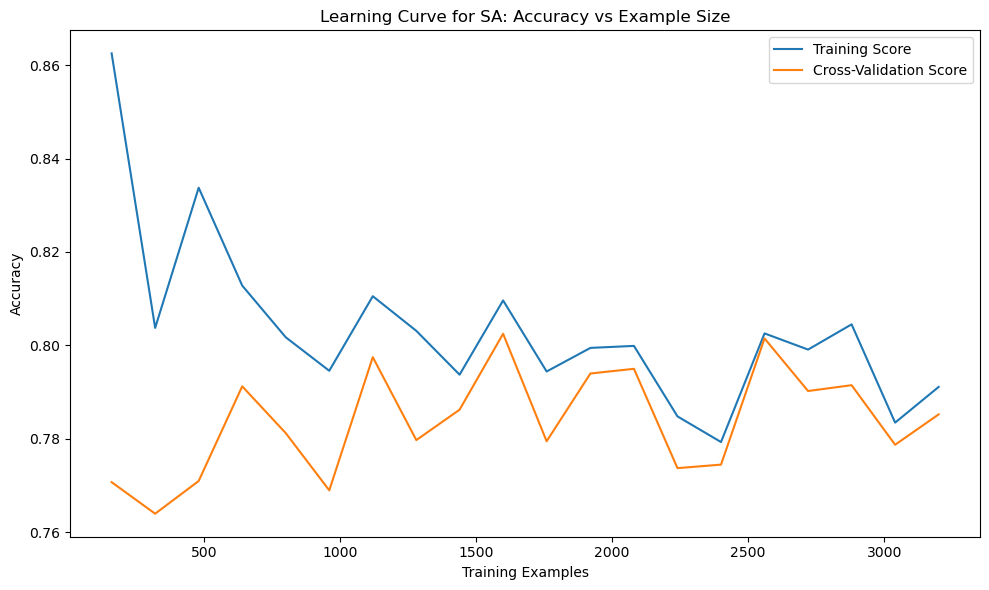


##########################################
Final Accuracy: 0.79
Final Precision: 0.79
Training Time: 2.0394 seconds
##########################################



In [22]:
# Learning Curve
start_time = time.time()

clf = NeuralNetwork(hidden_nodes=[14],
                    activation='sigmoid',
                    algorithm='simulated_annealing',
                    max_iters=1000,
                    learning_rate=0.5,
                    schedule=mlrose_hiive.GeomDecay(init_temp=1, decay=0.8),
                    early_stopping=True,
                    clip_max=5,
                    max_attempts=100,
                    random_state=21143,
                    curve=True)

train_sizes, train_scores_sa, test_scores_sa = learning_curve(
    clf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.05, 1.0, 20), n_jobs=5
)

end_time = time.time()
time_elapsed = end_time - start_time
print(f'Time elapsed 1: {time_elapsed} seconds')

# Plot accuracy against train data size
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores_sa, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores_sa, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SA: Accuracy vs Example Size')
plt.legend()
plt.tight_layout()
plt.savefig('/home/zsang/Documents/OSMCS/CS 7641/Projects/p2/plots/LC_NN_sa')
plt.show()

# Reset the classifier
clf = NeuralNetwork(hidden_nodes=[14],
                    activation='sigmoid',
                    algorithm='simulated_annealing',
                    max_iters=1000,
                    learning_rate=0.4,
                    schedule=mlrose_hiive.GeomDecay(init_temp=1, decay=0.8),
                    early_stopping=True,
                    clip_max=5,
                    max_attempts=100,
                    random_state=2133,
                    curve=True)

fitness_curves['sa'] = clf.fitness_curve

# Cross-validation with multiple metrics
scoring = {'accuracy': 'accuracy', 'precision': 'precision_weighted'}
cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

# Extract metrics and training time
final_accuracy['sa'] = np.mean(cv_results['test_accuracy'])
final_precision['sa'] = np.mean(cv_results['test_precision'])
clock_time['sa'] = np.mean(cv_results['fit_time'])

print(f'''
##########################################
Final Accuracy: {final_accuracy['sa']:.2f}
Final Precision: {final_precision['sa']:.2f}
Training Time: {clock_time['sa']:.4f} seconds
##########################################
''')

#### Genetic Algorithm

Time elapsed: 612.291868686676 seconds


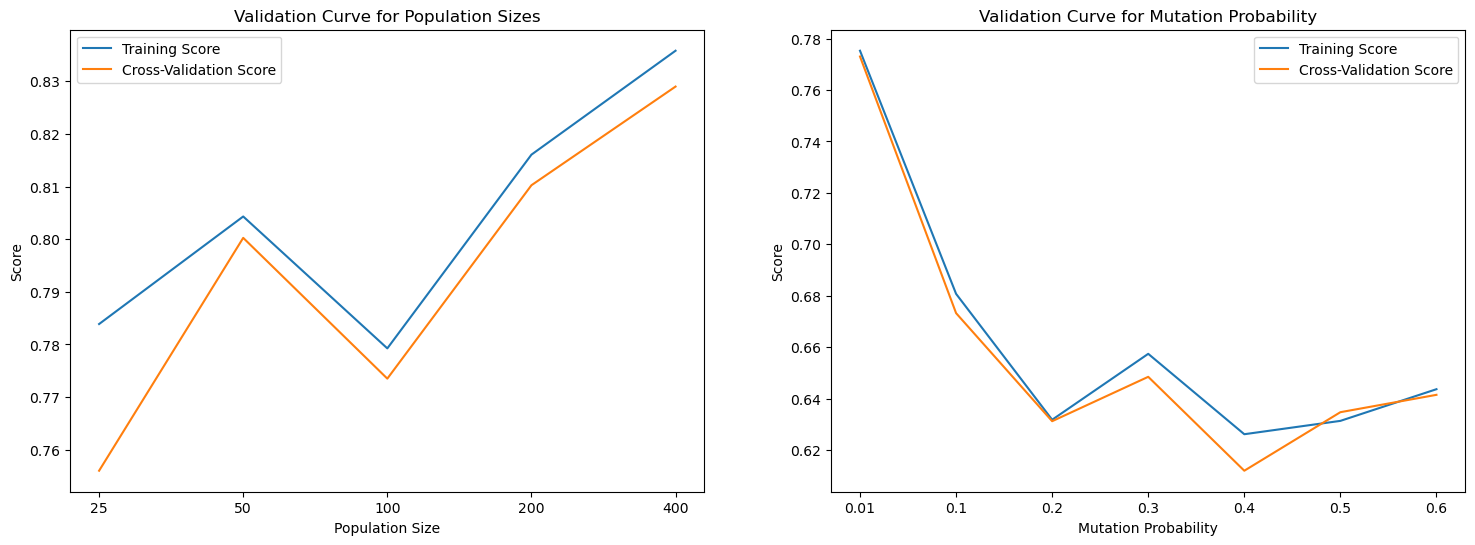

In [17]:
# Define the hyperparameter values to be tested
param_range_pop_size = [25, 50, 100, 200, 400]
param_range_mutation_prob = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

start_time = time.time()

# Validation Curve for restarts
train_scores_pop_size, test_scores_pop_size = validation_curve(
    NeuralNetwork(hidden_nodes=[14],
                  activation='sigmoid',
                  algorithm='genetic_alg',
                  max_iters=1000,
                  mutation_prob=0.01,
                  early_stopping=True,
                  clip_max=5,
                  max_attempts=10,
                  random_state=54353,
                  curve=False),
    X, y, param_name='pop_size', param_range=param_range_pop_size, cv=5, n_jobs=8, scoring='accuracy'
)

# Validation Curve for mutation_prob
train_scores_mutation_prob, test_scores_mutation_prob = validation_curve(
    NeuralNetwork(hidden_nodes=[14],
                  activation='sigmoid',
                  algorithm='genetic_alg',
                  max_iters=1000,
                  pop_size=50,
                  early_stopping=True,
                  clip_max=5,
                  max_attempts=10,
                  random_state=202423,
                  curve=False),
    X, y, param_name='mutation_prob', param_range=param_range_mutation_prob, cv=5, n_jobs=8, scoring='accuracy'
)

end_time = time.time()
time_elapsed = end_time - start_time
print(f'Time elapsed: {time_elapsed} seconds')

# Plot both Validation Curves side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Validation Curve for pop_size
axes[0].plot(range(len(param_range_pop_size)), np.mean(train_scores_pop_size, axis=1), label='Training Score')
axes[0].plot(range(len(param_range_pop_size)), np.mean(test_scores_pop_size, axis=1), label='Cross-Validation Score')
axes[0].set_xlabel('Population Size')
axes[0].set_ylabel('Score')
axes[0].set_xticks(range(len(param_range_pop_size)))
axes[0].set_xticklabels(param_range_pop_size)
axes[0].set_title('Validation Curve for Population Sizes')
axes[0].legend()

# Plot Validation Curve for mutation_prob
axes[1].plot(range(len(param_range_mutation_prob)), np.mean(train_scores_mutation_prob, axis=1), label='Training Score')
axes[1].plot(range(len(param_range_mutation_prob)), np.mean(test_scores_mutation_prob, axis=1), label='Cross-Validation Score')
axes[1].set_xlabel('Mutation Probability')
axes[1].set_ylabel('Score')
axes[1].set_xticks(range(len(param_range_mutation_prob)))
axes[1].set_xticklabels(param_range_mutation_prob)
axes[1].set_title('Validation Curve for Mutation Probability')
axes[1].legend()

plt.savefig('/home/zsang/Documents/OSMCS/CS 7641/Projects/p2/plots/VC_NN_ga.png')
plt.show()

Time elapsed 1: 2459.9030044078827 seconds


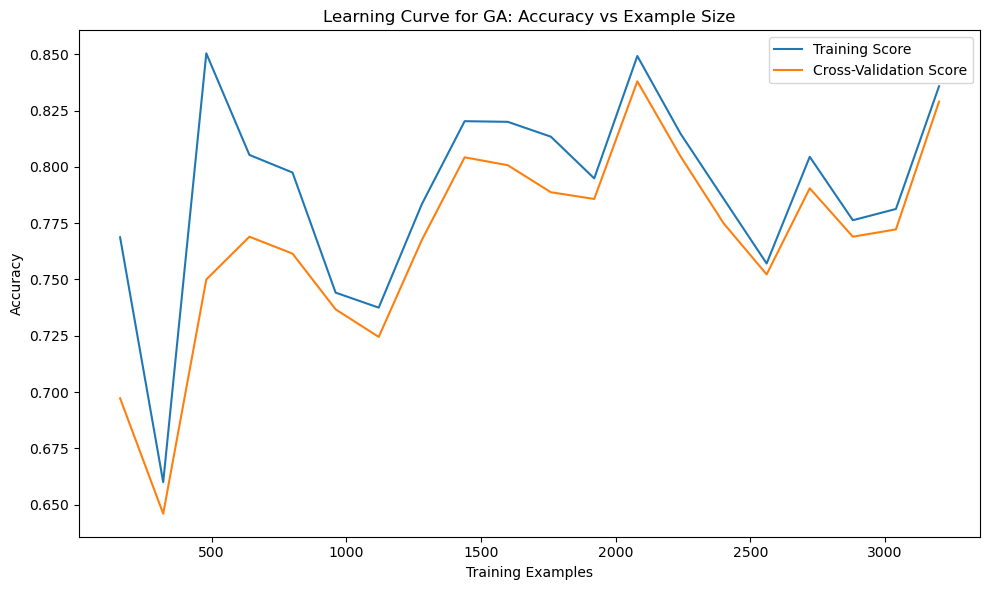


##########################################
Final Accuracy: 0.83
Final Precision: 0.83
Training Time: 181.2938 seconds
##########################################



In [18]:
# Learning Curve
start_time = time.time()

clf = NeuralNetwork(hidden_nodes=[14],
                    activation='sigmoid',
                    algorithm='genetic_alg',
                    max_iters=1000,
                    pop_size=400,
                    mutation_prob=0.01,
                    early_stopping=True,
                    clip_max=5,
                    max_attempts=10,
                    random_state=54353,
                    curve=False)

train_sizes, train_scores_ga, test_scores_ga = learning_curve(
    clf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.05, 1.0, 20), n_jobs=5
)

end_time = time.time()
time_elapsed = end_time - start_time
print(f'Time elapsed 1: {time_elapsed} seconds')

# Plot accuracy against train data size
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores_ga, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores_ga, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for GA: Accuracy vs Example Size')
plt.legend()
plt.tight_layout()
plt.savefig('/home/zsang/Documents/OSMCS/CS 7641/Projects/p2/plots/LC_NN_ga')
plt.show()

# Reset the classifier
clf = NeuralNetwork(hidden_nodes=[14],
                    activation='sigmoid',
                    algorithm='genetic_alg',
                    max_iters=1000,
                    pop_size=400,
                    mutation_prob=0.01,
                    early_stopping=True,
                    clip_max=5,
                    max_attempts=10,
                    random_state=54353,
                    curve=True)

fitness_curves['ga'] = clf.fitness_curve

# Cross-validation with multiple metrics
scoring = {'accuracy': 'accuracy', 'precision': 'precision_weighted'}
cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

# Extract metrics and training time
final_accuracy['ga'] = np.mean(cv_results['test_accuracy'])
final_precision['ga'] = np.mean(cv_results['test_precision'])
clock_time['ga'] = np.mean(cv_results['fit_time'])

print(f'''
##########################################
Final Accuracy: {final_accuracy['ga']:.2f}
Final Precision: {final_precision['ga']:.2f}
Training Time: {clock_time['ga']:.4f} seconds
##########################################
''')

#### Comparison

In [71]:
print(final_accuracy)
print(clock_time)

{'gd': 0.7535000000000001, 'rhc': 0.8287500000000001, 'sa': 0.78675, 'ga': 0.829}
{'gd': 2.851016902923584, 'rhc': 40.89419951438904, 'sa': 2.039399003982544, 'ga': 181.29375400543213}


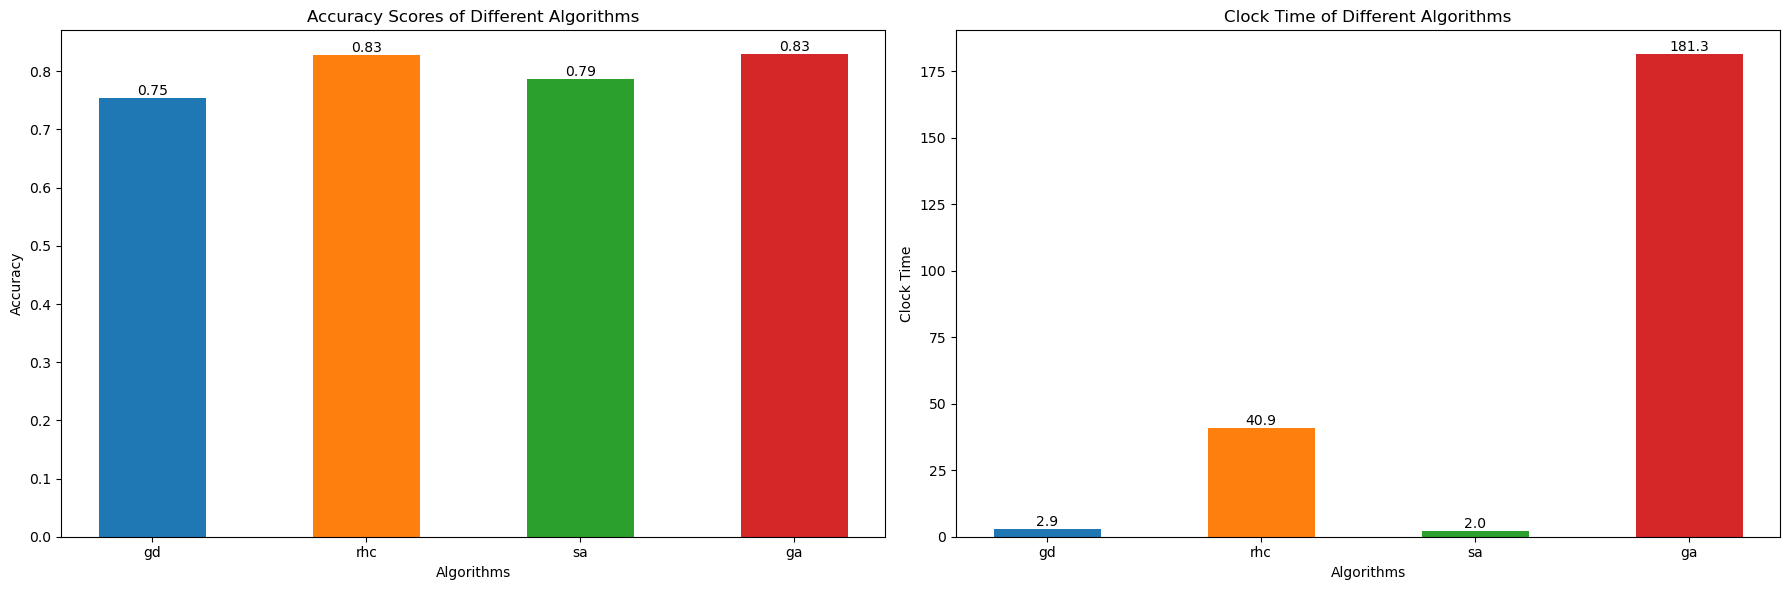

In [79]:
label = ['gd', 'rhc', 'sa', 'ga']
bar_width = 0.5

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Accuracy Scores
for i in range(len(final_accuracy)):
    value = list(final_accuracy.values())[i]
    axes[0].bar(i+1, value, bar_width, label=label[i])
    axes[0].text(i+1, value, f'{value:.2f}', ha='center', va='bottom')

axes[0].set_xlabel('Algorithms')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Scores of Different Algorithms')
axes[0].set_xticks(range(1, 5))
axes[0].set_xticklabels(label)

# Plot Clock Time
for i in range(len(clock_time)):
    value = list(clock_time.values())[i]
    axes[1].bar(i+1, value, bar_width, label=label[i])
    axes[1].text(i+1, value, f'{value:.1f}', ha='center', va='bottom')

axes[1].set_xlabel('Algorithms')
axes[1].set_ylabel('Clock Time')
axes[1].set_title('Clock Time of Different Algorithms')
axes[1].set_xticks(range(1, 5))
axes[1].set_xticklabels(label)

plt.tight_layout()
plt.savefig('/home/zsang/Documents/OSMCS/CS 7641/Projects/p2/plots/comparison_apple')
plt.show()
